In [1]:
import sys
sys.path.append("..")

from dataset import voc
from dataset.transform import *

In [2]:
# BASIC DATALOADING

In [3]:
data = voc.VOCSegmentation('/vandal/datasets/', image_set='val')
# data.images

(500, 366)


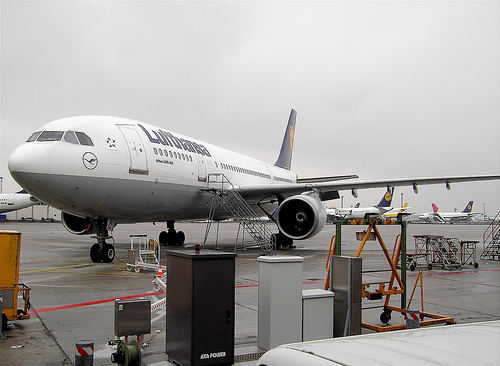

In [4]:
print(data[0][0].size)
data[0][0]

(500, 366)


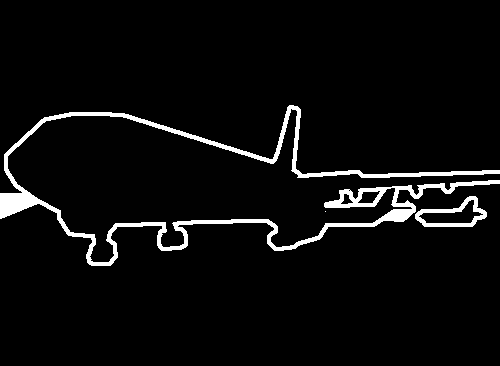

In [5]:
print(data[0][1].size)
data[0][1]

In [6]:
# Instance here your transform!
transform = Compose([ColorJitter(0.4, 0.5, 0, 0.5), Resize(250), RandomCrop(224), RandomHorizontalFlip(0.5)]) 
transform

Compose(
    ColorJitter(brightness=[0.6, 1.4], contrast=[0.5, 1.5], saturation=None, hue=[-0.5, 0.5])
    Resize(size=250, interpolation=PIL.Image.BILINEAR)
    RandomCrop(size=(224, 224), padding=0)
    RandomHorizontalFlip(p=0.5)
)

In [7]:
data_tr = voc.VOCSegmentation('/vandal/datasets/', image_set='val', transform=transform)


(224, 224)


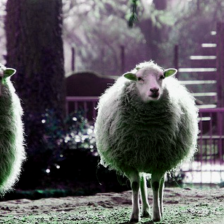

In [8]:
images = data_tr[30]
print(images[0].size)
images[0]

(224, 224)


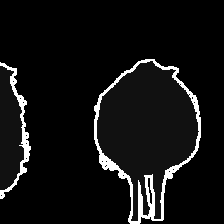

In [9]:
print(images[1].size)
images[1]

In [10]:
# test ToTensor and Normalize Transforms
train_transform = Compose([
            RandomResizedCrop(513, (0.5, 2.0)),
            RandomHorizontalFlip(),
            ToTensor(),
            Normalize(mean=[0.485, 0.456, 0.406],
                      std=[0.229, 0.224, 0.225]),
        ])
#transform = Compose([ToTensor(), Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])
data_tr = voc.VOCSegmentation('/vandal/datasets/', image_set='val', transform=train_transform)
images = data_tr[30]
print(images[0].size)
images[0]

<built-in method size of Tensor object at 0x7f1fed2111f8>


tensor([[[-1.4843, -1.4329, -1.3987,  ...,  1.4954,  1.4783,  1.5297],
         [-1.5014, -1.4500, -1.4158,  ...,  1.3755,  1.4269,  1.5125],
         [-1.5185, -1.4843, -1.4500,  ...,  1.2557,  1.3755,  1.4783],
         ...,
         [-1.6898, -1.7754, -1.7754,  ...,  2.0092,  1.9920,  1.8379],
         [-1.9124, -1.9638, -1.9638,  ...,  1.9578,  1.9407,  1.8379],
         [-2.0152, -2.0665, -2.0837,  ...,  1.8893,  1.8722,  1.8208]],

        [[-1.3179, -1.2654, -1.2304,  ...,  1.6758,  1.6583,  1.7108],
         [-1.3529, -1.2829, -1.2479,  ...,  1.5532,  1.6057,  1.6933],
         [-1.3880, -1.3179, -1.2829,  ...,  1.4307,  1.5532,  1.6408],
         ...,
         [-1.6331, -1.7206, -1.7031,  ...,  2.1660,  2.1485,  1.9909],
         [-1.8606, -1.9132, -1.9132,  ...,  2.1134,  2.0959,  1.9909],
         [-1.9832, -2.0182, -2.0357,  ...,  2.0434,  2.0259,  1.9734]],

        [[-0.8807, -0.8284, -0.7936,  ...,  1.9603,  1.9428,  1.9951],
         [-0.8981, -0.8458, -0.8110,  ...,  1

In [11]:
print(images[1].size)
images[1]
np.unique(images[1].cpu().numpy())


<built-in method size of Tensor object at 0x7f1fed2d9cf0>


array([  0,  17, 255], dtype=uint8)